## Build Gradient Boosting Model

In [1]:
# Import relevant libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle
import warnings
#warnings.filterwarnings('error', category=DeprecationWarning)
warnings.filterwarnings('ignore')

### Step 1: Data Wrangling

In [2]:
# Create dataframe
df_original = pd.read_csv("Invistico_Airline.csv")

In [3]:
df_original.shape

(129880, 22)

In [4]:
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
# Descriptive statistics for numeric features
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [6]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [7]:
df_original.isna().any()

satisfaction                         False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
dtype: bool

### Step 2: Prepare dataset 

In [8]:
df_original['Arrival Delay in Minutes'].isna().sum()

np.int64(393)

There are 393 missing value for 'Arrival Delay in Minutes' feature. Instead of using

common mean for this feature, we'll use group mean as per satisfaction feature 

since this has a direct corelation with flight delay.

In [9]:
# Impute group mean based on satisfaction status 
mean_arrival_delay = df_original.groupby('satisfaction')['Arrival Delay in Minutes'].mean()
mean_arrival_delay

satisfaction
dissatisfied    18.504599
satisfied       12.268883
Name: Arrival Delay in Minutes, dtype: float64

In [10]:
df_imputed = df_original.copy(deep=True)

In [11]:
# Missing value imputation as per group mean
for index in mean_arrival_delay.index:
    df_imputed.loc[(df_imputed['Arrival Delay in Minutes'].isna()) & 
    (df_imputed['satisfaction']==index), 'Arrival Delay in Minutes'] = mean_arrival_delay[index]

In [12]:
df_imputed['Arrival Delay in Minutes'].describe()

count    129880.000000
mean         15.091615
std          38.407793
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

#### Transform features

There are four categorical features including the target varable that have to transformed.

In [13]:
# Transform categorical features into dummy variables
cat_cols = ['satisfaction','Customer Type','Type of Travel','Class']
df_dummies = pd.get_dummies(df_imputed, columns=cat_cols, drop_first=True)

In [14]:
df_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0,0.0,True,False,True,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,310,305.0,True,False,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0,0.0,True,False,True,True,False
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0,0.0,True,False,True,True,False
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0,0.0,True,False,True,True,False


In [15]:
# Define y (target) variable
y = df_dummies['satisfaction_satisfied']

# Define X (predictor) variables
X = df_dummies.drop(columns=['satisfaction_satisfied'])

In [16]:
# Split dataset for training, validation and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25,
                                            stratify=y_train, random_state=42)

### Step 3: Model Building

In [17]:
xgb = XGBClassifier(object='binary:logistic', sample=0.4, random_state=42)

In [18]:
params = {'n_estimators': [50, 75, 100],
          'max_depth': [5, 7],
          'learning_rate': [0.1, 0.2],
          'colsample_bytree': [0.5, 0.7]
          }

In [19]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [20]:
xgb_cv = GridSearchCV(estimator=xgb, param_grid=params,
                      scoring=scoring, cv=5, refit='f1')

In [21]:
# %%time
# xgb_cv.fit(X_train, y_train)

### Save the optimized model parameters

In [22]:
# pickle.dump(xgb_cv, open('xgb_cv_model.pkl', 'wb'))

In [23]:
xgb_cv_model = pickle.load(open('xgb_model.pkl', 'rb'))

### Step 4: Model Evaluation 

In [24]:
y_pred_cv = xgb_cv_model.predict(X_test)

In [25]:
acc_cv = accuracy_score(y_test, y_pred_cv)
prec_cv = precision_score(y_test, y_pred_cv)
rec_cv = recall_score(y_test, y_pred_cv)
f1_cv = f1_score(y_test, y_pred_cv)

In [26]:
print(f"Accuracy: {round(acc_cv, 3)}")
print(f"Precision: {round(prec_cv, 3)}")
print(f"Recall: {round(rec_cv, 3)}")
print(f"F1 Score: {round(f1_cv, 3)}")

Accuracy: 0.957
Precision: 0.969
Recall: 0.952
F1 Score: 0.96


In [27]:
cm_cv = confusion_matrix(y_test, y_pred_cv, labels=[1, 0])
cm_cv_df = pd.DataFrame(cm_cv, columns=['Satisfied', 'Dissatisfied'], index=['Satisfied', 'Dissatisfied'])
cm_cv_df

,Satisfied,Dissatisfied
Satisfied,16926,846
Dissatisfied,549,14149


Text(45.72222222222221, 0.5, 'Actual Class\n')

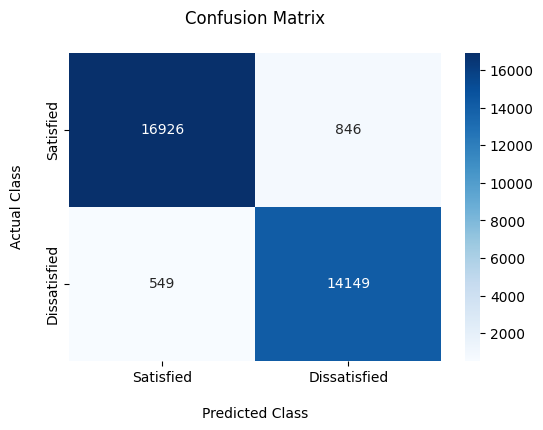

In [28]:
plt.figure(figsize=(6, 4))
p = sns.heatmap(cm_cv_df, cmap='Blues', annot=True, fmt='g')
plt.title('Confusion Matrix\n')
plt.xlabel('\nPredicted Class')
plt.ylabel('Actual Class\n')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

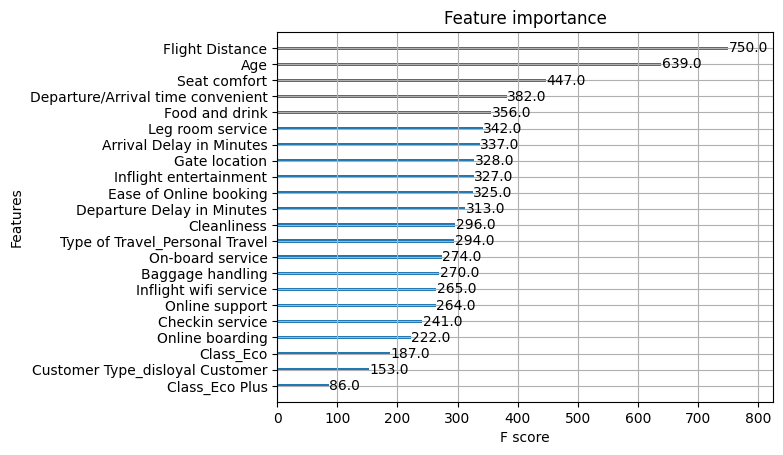

In [29]:
plot_importance(xgb_cv_model.best_estimator_)

### Use single validation set instead of cross validation

In [30]:
# Create list of split indices for validation dataset
split_ind = [0 if x in X_val.index else -1 for x in X_train.index ]

In [31]:
custom_split = PredefinedSplit(split_ind)

In [32]:
grid_val = GridSearchCV(xgb, params, scoring=scoring, cv=custom_split, refit='f1')

In [33]:
# %%time
# grid_val.fit(X_train, y_train)

In [34]:
#pickle.dump(grid_val, open('xgb_val_model.pkl', 'wb'))
xgb_val_model = pickle.load(open('xgb_val_model.pkl', 'rb'))

In [35]:
y_pred_val = xgb_val_model.predict(X_test)

In [36]:
acc_val = accuracy_score(y_test, y_pred_val)
prec_val = precision_score(y_test, y_pred_val)
rec_val = recall_score(y_test, y_pred_val)
f1_val = f1_score(y_test, y_pred_val)

In [37]:
df_result = pd.DataFrame(data={'Training Method': ['Cross Validation', 'Single Validation'],
                          'Accuracy': [acc_cv, acc_val],
                          'Precision': [prec_cv, prec_val],
                          'Recall': [rec_cv, rec_val],
                          'F1 Score': [f1_cv, f1_val]
                         }, index=[1, 2])
df_result.sort_values(by='F1 Score', ascending=False)

,Training Method,Accuracy,Precision,Recall,F1 Score
1,Cross Validation,0.957037,0.968584,0.952397,0.960422
2,Single Validation,0.955744,0.967757,0.950822,0.959214


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

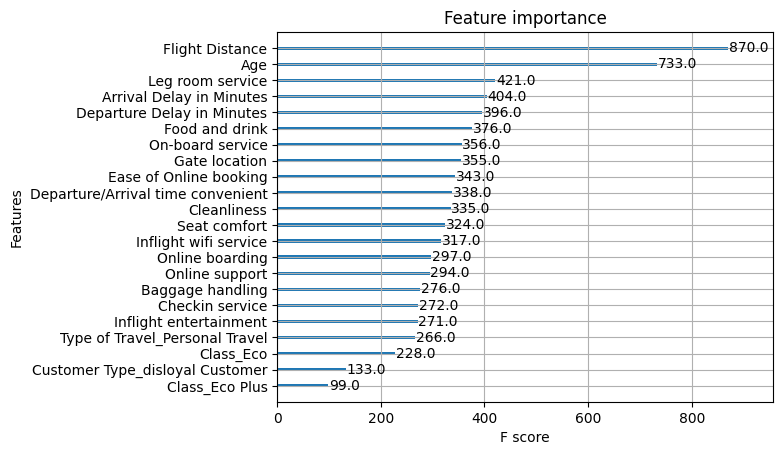

In [39]:
plot_importance(xgb_val_model.best_estimator_)

### Step 5: Analysis of the Final Result
Here two variants of XGBoost implementation are performed. Firstly, the model hyperparameters values are chosen applying randomSearchCV with 5-fold cross validation technique. On the otherhand the second model was trained with hyperparameter values chosen by using a single validation dataset to save training time. It is oberseved that the formmer technique marginally outperforms the latter one while both techniques produce very high performance, i.e. above 95% F1 score. Flight distance and age appear to be two most important features for splitting nodes in the base learner models. With very impressive performances, either of the models are recommened to deploy for measuring the airline's customer satisfaction.  